# Report

For this homework task we needed to create a webscraper to scrape 5 different categories to make a CNN model. I have chosen to make my model about different kinds of vehicles. I chose this because I thought it would be interesting to make a model that predicts what kind of vehicle is in the picture and because vehicles are used a lot in this day and age. 

The webscraper was not that hard. Most of the code is code that we saw in the data science course. The hardest part was how to download the images, this was something that we had not used in another course. So for this part I used ChatGPT.

For the EDA I did not have many problems. It was very easy to count all of the different pictures. for visualising the pictures it was not that difficult to find out how to do it.

The splitting of the dataset was not difficult. It is mostly the same as how we split the dataset in the exercises of computervision.

For creating the model it was just tweaking some values but over all it was not a lot of work. I did have a few problems when I was trying to fit the model. But it did not take to long to fix the error.

As you can see in the loss curve and the accuracy curve the model is not very good but I could not get it any better with the data that I got. As you can see a bit below the curves the accuracy of my model is 0.6428571343421936. 
In the confusion matrix you can see that a lot of the faults it predicts that it is a motorcycle.

Looking at the curves from Googles teachable machine the madel that they created is a lot better than mine.

# GenAI

For the genAI task I used ChatGPT to ask how to download images from a list of URL's.
I used: how to download images from a list of urls in python.
The answer I got was:

image_urls = [

    "https://example.com/image1.jpg",

    "https://example.com/image2.jpg",

    "https://example.com/image3.jpg",

]

if not os.path.exists("downloaded_images"):

    os.makedirs("downloaded_images")

for i, url in enumerate(image_urls):

    response = requests.get(url)

    if response.status_code == 200:

        img = Image.open(BytesIO(response.content))

        img.save(f"downloaded_images/image_{i + 1}.jpg")

        print(f"Downloaded image_{i + 1}.jpg")

    else:

        print(f"Failed to download image from URL: {url}")
        

print("All images downloaded and saved.")


# streamlit

I can not acces my folders containing the pictures. This means that I cant make a training_set and a validation_set so I cant train a model.

my streamlit app: https://kierancornelissentask3.streamlit.app/

# Imports

In [254]:
# Here we do all the imports we need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

from keras import optimizers
from keras import layers

from selenium import webdriver
from selenium import webdriver
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import urllib.request
import random

# The webscraper to scrape 5 kinds of vehicles (car, bike, bus, plain, boat).

In [16]:
# Launch Chrome browser
browser = webdriver.Chrome()
browser.get('https://images.google.com/')

# We search for the accept all cookies button, click it and wait for 5 seconds
cookies = browser.find_element(By.ID,"L2AGLb")
cookies.click()

time.sleep(5)

def searchVehicles(vehicle):
# Open Google Images
    browser.get('https://images.google.com/')
# Search for "car pictures"
    search_box = browser.find_element(By.NAME,'q')
    search_box.send_keys(vehicle+' pictures')
    search_box.submit()

# Scroll down to load more images
    for i in range(5):
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)

# Find and extract image URLs
    
    for img in browser.find_elements(By.XPATH,'//img[contains(@class,"rg_i")]'):
        image_urls.append(img.get_attribute('src'))


# Loop over all the different types of vehicles
vehicles = ['car', 'motorbike', 'bus', 'plane', 'boat']
for vehicle in vehicles:
    image_urls = []
    # we search for the vehicle on google using the defenition we created
    searchVehicles(vehicle)
    # If the folders dont exist yet we add them
    if not os.path.exists('data/testing_set/'+vehicle):
            os.makedirs('data/testing_set/'+vehicle)
    if not os.path.exists('data/training_set/'+vehicle):
            os.makedirs('data/training_set/'+vehicle)

    i=0
    # We shuffle the url list so we can randomly add pictures to the testing set and the training set
    np.random.shuffle(image_urls)
    # Loop over all the url's
    for url in image_urls:
        # We place 20% of the images in the testing set and 80% in the training set
        if i<=int(len(image_urls) * 0.2):
            try:
                urllib.request.urlretrieve(url, f"data/testing_set/{vehicle}/{vehicle}.{i}.jpg")
            except:
                x = 0
        else:
            try:
                urllib.request.urlretrieve(url, f"data/training_set/{vehicle}/{vehicle}.{i}.jpg")
            except:
                x = 0
        i+=1

browser.quit()

# EDA

In [216]:
# We search all the folders in the folder data if they have the vehicle in the name
root_directory = "./data"
def count_pictures(root_directory, vehicle):
    counter = 0
    for foldername, subfolders, filenames in os.walk(root_directory):
        for filename in filenames:
            if vehicle in filename:
                counter += 1
    return counter

# Loop over all the vehicles
vehicles = ['boat', 'bus', 'car', 'motorbike', 'plane']
total_count = 0
for vehicle in vehicles:
    # Add and print the amount of pictures of this type of vehicle
    count = count_pictures(root_directory, vehicle)
    print(f"Number of pictures of a {vehicle}: {count}")
    total_count += count
    count = 0
# Print the total amount of pictures
print(f"Total amount of pictures: {total_count}")

Number of pictures of a boat: 184
Number of pictures of a bus: 167
Number of pictures of a car: 187
Number of pictures of a motorbike: 202
Number of pictures of a plane: 170
Total amount of pictures: 910


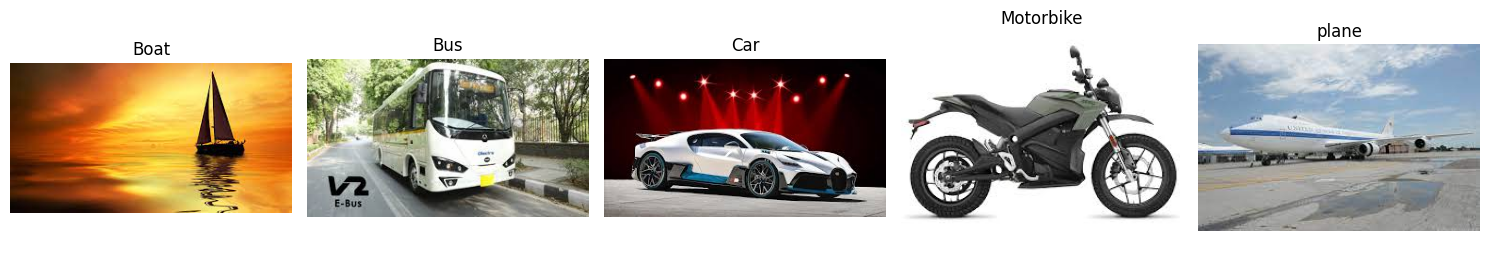

In [227]:
image_data = [
    {"path": "./data/testing_set/boat/boat.13.jpg", "title": "Boat"},
    {"path": "./data/testing_set/bus/bus.2.jpg", "title": "Bus"},
    {"path": "./data/testing_set/car/car.2.jpg", "title": "Car"},
    {"path": "./data/testing_set/motorbike/motorbike.0.jpg", "title": "Motorbike"},
    {"path": "./data/testing_set/plane/plane.26.jpg", "title": "plane"}
]

# Create a figure with a 1x5 grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Loop through the image data and display each image with a title
for i, image_info in enumerate(image_data):
    img = mpimg.imread(image_info["path"])
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axis (optional)
    axes[i].set_title(image_info["title"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Split the dataset

In [257]:
train_val_datagen = ImageDataGenerator(
    validation_split=0.2,     # Split the data into training and validation sets with an 80/20 ratio.
    rescale=1./255,           # Rescale pixel values to the range [0, 1].
    shear_range=0.2,          # Apply shear transformations to augment the data.
    zoom_range=0.2,           # Apply zoom transformations to augment the data.
    horizontal_flip=True      # Apply horizontal flipping as an augmentation technique.
)

# Create an ImageDataGenerator for the test data, only rescaling is applied.
test_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to the range [0, 1] for test data.
)

# Create a training data generator from the 'training_set' directory.
training_set = train_val_datagen.flow_from_directory(
    'data/training_set',     # Directory containing the training data.
    subset='training',       # Use the training subset of data.
    target_size=(64, 64),    # Resize images to a 64x64 pixel size.
    batch_size=32,           # Set the batch size for training data.
    class_mode='categorical' # Categorical labels for classification.
)

# Create a validation data generator from the 'training_set' directory.
validation_set = train_val_datagen.flow_from_directory(
    'data/training_set',     # Directory containing the training data.
    subset='validation',     # Use the validation subset of data.
    target_size=(64, 64),    # Resize images to a 64x64 pixel size.
    batch_size=32,           # Set the batch size for validation data.
    class_mode='categorical' # Categorical labels for classification.
)

# Create a test data generator from the 'testing_set' directory.
test_set = test_datagen.flow_from_directory(
    'data/testing_set',      # Directory containing the test data.
    target_size=(64, 64),    # Resize images to a 64x64 pixel size.
    batch_size=32,           # Set the batch size for test data.
    class_mode='categorical' # Categorical labels for classification.
)

Found 607 images belonging to 5 classes.
Found 149 images belonging to 5 classes.
Found 154 images belonging to 5 classes.


# model

In [258]:
# Define the number of classes in your classification problem.
NUM_CLASSES = 5

# Create a sequential model, which is a linear stack of layers.
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation.
    layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"),
    
    # Max-pooling layer with a 2x2 pool size to downsample the feature maps.
    layers.MaxPooling2D((2, 2)),
    
    # Dropout layer with a 20% dropout rate to prevent overfitting.
    layers.Dropout(0.2),
    
    # Second convolutional layer with 256 filters, a 3x3 kernel, and ReLU activation.
    layers.Conv2D(256, (3, 3), activation="relu"),
    
    # Second max-pooling layer with a 2x2 pool size.
    layers.MaxPooling2D((2, 2)),
    
    # Another dropout layer to further prevent overfitting.
    layers.Dropout(0.2),
    
    # Flatten layer to transform the 2D feature maps into a 1D vector.
    layers.Flatten(),
    
    # Fully connected dense layer with 128 units and a sigmoid activation function.
    layers.Dense(128, activation="sigmoid"),
    
    # Output layer with NUM_CLASSES units and softmax activation for multi-class classification.
    layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile the model with an Adam optimizer, binary cross-entropy loss, and accuracy metric.
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model architecture.
print(model.summary())

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_70 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_71 (Conv2D)          (None, 29, 29, 256)       73984     
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 14, 14, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_71 (Dropout)        (None, 14, 14, 256)     

In [259]:
# Fit the model to the training data and validate it on the validation set.
history = model.fit(
    training_set,               # Training data generator.
    validation_data=validation_set,  # Validation data generator.
    epochs=20                    # Number of training epochs (iterations).
)

Epoch 1/20
19/19 [==============================] - 5s 209ms/step - loss: 0.5432 - accuracy: 0.2059 - val_loss: 0.5362 - val_accuracy: 0.2013
Epoch 2/20
19/19 [==============================] - 2s 123ms/step - loss: 0.4675 - accuracy: 0.3493 - val_loss: 0.4850 - val_accuracy: 0.3154
Epoch 3/20
19/19 [==============================] - 2s 127ms/step - loss: 0.4285 - accuracy: 0.4580 - val_loss: 0.4339 - val_accuracy: 0.3826
Epoch 4/20
19/19 [==============================] - 2s 125ms/step - loss: 0.3998 - accuracy: 0.5354 - val_loss: 0.4151 - val_accuracy: 0.4832
Epoch 5/20
19/19 [==============================] - 2s 121ms/step - loss: 0.3706 - accuracy: 0.5783 - val_loss: 0.4117 - val_accuracy: 0.4966
Epoch 6/20
19/19 [==============================] - 2s 122ms/step - loss: 0.3486 - accuracy: 0.6326 - val_loss: 0.3980 - val_accuracy: 0.5369
Epoch 7/20
19/19 [==============================] - 2s 125ms/step - loss: 0.3293 - accuracy: 0.6392 - val_loss: 0.3881 - val_accuracy: 0.5369
Epoch 

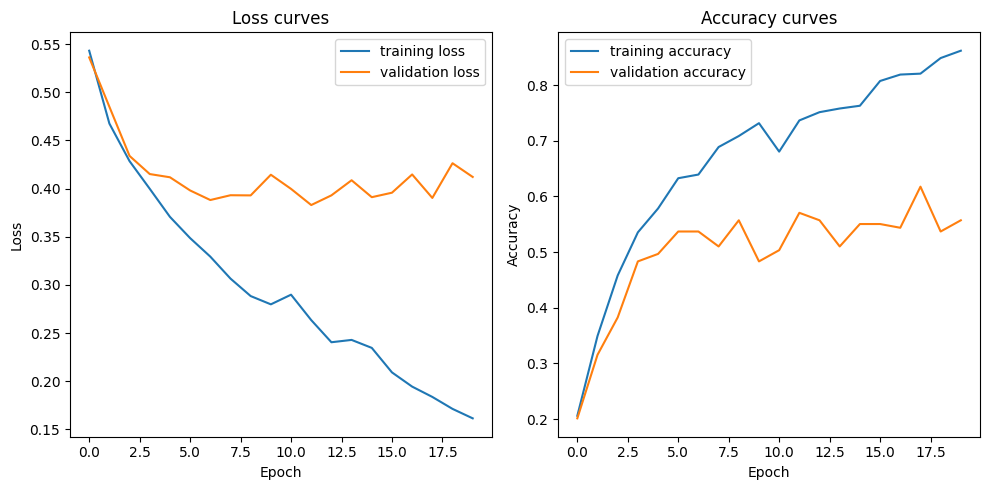

In [260]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [266]:
# Define a list of vehicle classes.
vehicles = ['boat', 'bus', 'car', 'motorbike', 'plane']

# Load an image and resize it to 64x64 pixels.
test_image = image.load_img("data/testing_set/boat/boat.7.jpg", target_size=(64, 64))

# Convert the loaded image to a NumPy array.
test_image = image.img_to_array(test_image)

# Expand the dimensions of the image to create a batch of size 1 for prediction.
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to predict the class of the test image.
result = model.predict(test_image)

# Create a string to describe the prediction.
printString = 'I think it is a '

# Find the index of the class with the highest predicted probability.
index = result.argmax()

# Print the prediction, combining the string with the predicted vehicle class.
print(printString + vehicles[index])

1/1 [==============================] - 0s 16ms/step
I think it is a boat


In [262]:
# Use the trained model to evaluate its performance on the test dataset.
test_loss, test_acc = model.evaluate(test_set)

# Print the test accuracy, which is the model's performance on the test dataset.
print('Test accuracy (model):', test_acc)


5/5 [==============================] - 0s 101ms/step - loss: 0.3435 - accuracy: 0.6429
Test accuracy (model): 0.6428571343421936


In [269]:
# Use the trained model to predict labels for the test dataset.
predicted_list = model.predict(test_set)

# Create an empty list to store the predicted labels.
predicted_labels = []

# Iterate through the predictions and find the index of the class with the highest probability.
for predict in predicted_list:
    predicted_labels.append(predict.argmax())


5/5 [==============================] - 0s 19ms/step


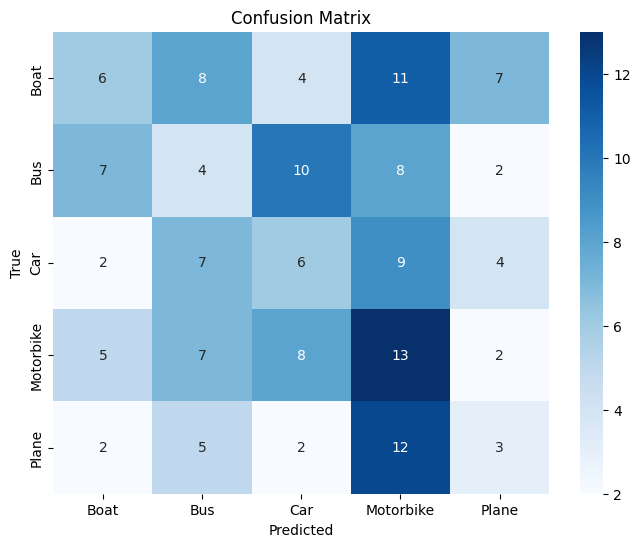

In [268]:
# Calculate the confusion matrix by comparing true labels from the test set to predicted labels.
confusion = confusion_matrix(test_set.labels, predicted_labels)

# Define class labels for better visualization.
class_labels = ["Boat", "Bus", "Car", "Motorbike", "Plane"]

# Create a heatmap to visualize the confusion matrix.
plt.figure(figsize=(8, 6))
# Create a heatmap using Seaborn, with annotations, integer formatting, and class labels as tick labels.
sns.heatmap(confusion, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')  # Set the title for the heatmap.
plt.show()  # Display the heatmap.

# Google teachablemachine

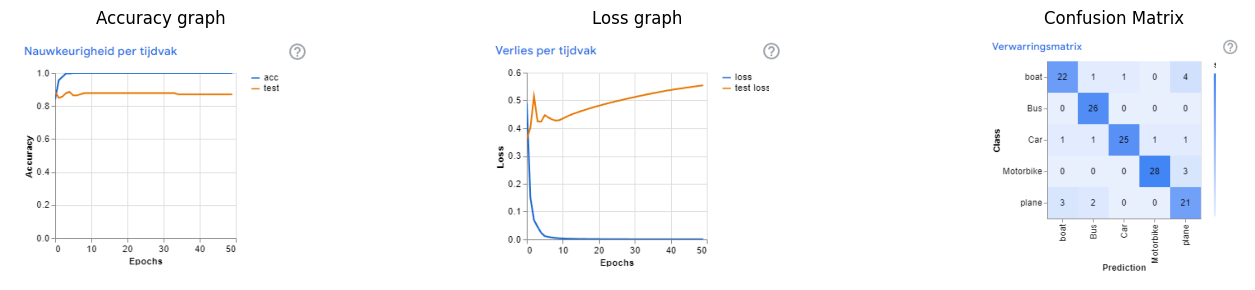

In [237]:
image_data = [
    {"path": "./google_model/accuracy.png", "title": "Accuracy graph"},
    {"path": "./google_model/loss.png", "title": "Loss graph"},
    {"path": "./google_model/confusionMatrix.png", "title": "Confusion Matrix"},
]

# Create a figure with a 1x5 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Loop through the image data and display each image with a title
for i, image_info in enumerate(image_data):
    img = mpimg.imread(image_info["path"])
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axis (optional)
    axes[i].set_title(image_info["title"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Streamlit

In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras import optimizers
from keras import layers
import requests
from PIL import Image
from io import BytesIO
import os
import numpy as np

# Define a Streamlit app
def main():
    st.title("Vehicle Classifier EDA and Training Controls")

    # EDA Section
    st.header("Exploratory Data Analysis (EDA)")
    
    # Display some sample images
    st.subheader("Sample Images")
    
    root_directory = "./data"
    def count_pictures(root_directory, vehicle):
        counter = 0
        for foldername, subfolders, filenames in os.walk(root_directory):
            for filename in filenames:
                if vehicle in filename:
                    counter += 1
        return counter

# Loop over all the vehicles
    vehicles = ['boat', 'bus', 'car', 'motorbike', 'plane']
    total_count = 0
    for vehicle in vehicles:
    # Add and print the amount of pictures of this type of vehicle
        count = count_pictures(root_directory, vehicle)
        st.text(f"Number of pictures of a {vehicle}: {count}")
        total_count += count
        count = 0
# Print the total amount of pictures
    st.text(f"Total amount of pictures: {total_count}")
    
    # Define a map to your GitHub repository
    map = 'https://raw.githubusercontent.com/kieran31415/AI/main/Homework/Task3/data'

    image_data = [
        {"path": f"{map}/testing_set/boat/boat.13.jpg", "title": "Boat"},
        {"path": f"{map}/testing_set/bus/bus.2.jpg", "title": "Bus"},
        {"path": f"{map}/testing_set/car/car.2.jpg", "title": "Car"},
        {"path": f"{map}/testing_set/motorbike/motorbike.0.jpg", "title": "Motorbike"},
        {"path": f"{map}/testing_set/plane/plane.26.jpg", "title": "Plane"}
    ]

    # Display images using Streamlit
    st.title("Image Gallery")

    for image_info in image_data:
        st.subheader(image_info["title"])
        st.image(image_info["path"])

    # Training Controls Section
    st.header("Training Controls")

    # Slider for the number of training epochs
    num_epochs = st.slider("Number of Epochs", min_value=1, max_value=50, value=20)

    # Button to start training
    if st.button("Start Training"):
        st.text(f"Training model for {num_epochs} epochs...")

        # Include your training code here, updating the model with the selected options
        base_url = "https://github.com/kieran31415/AI/tree/main/Homework/Task3/data/"

    # Create an ImageDataGenerator
        train_val_datagen = ImageDataGenerator(validation_split=0.2,
                                           rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

    # Create a list of categories
        categories = ['boat', 'bus', 'car', 'motorbike', 'plane']

    # Create the training and validation sets using the fetched images
        train_val_datagen = ImageDataGenerator(
            validation_split=0.2,     # Split the data into training and validation sets with an 80/20 ratio.
            rescale=1./255,           # Rescale pixel values to the range [0, 1].
            shear_range=0.2,          # Apply shear transformations to augment the data.
            zoom_range=0.2,           # Apply zoom transformations to augment the data.
            horizontal_flip=True      # Apply horizontal flipping as an augmentation technique.
        )

# Create an ImageDataGenerator for the test data, only rescaling is applied.
        test_datagen = ImageDataGenerator(
            rescale=1./255  # Rescale pixel values to the range [0, 1] for test data.
        )

# Create a training data generator from the 'training_set' directory.
        training_set = train_val_datagen.flow_from_directory(
            'data/training_set',     # Directory containing the training data.
            subset='training',       # Use the training subset of data.
            target_size=(64, 64),    # Resize images to a 64x64 pixel size.
            batch_size=32,           # Set the batch size for training data.
            class_mode='categorical' # Categorical labels for classification.
        )

# Create a validation data generator from the 'training_set' directory.
        validation_set = train_val_datagen.flow_from_directory(
            'data/training_set',     # Directory containing the training data.
            subset='validation',     # Use the validation subset of data.
            target_size=(64, 64),    # Resize images to a 64x64 pixel size.
            batch_size=32,           # Set the batch size for validation data.
            class_mode='categorical' # Categorical labels for classification.
        )

# Create a test data generator from the 'testing_set' directory.
        test_set = test_datagen.flow_from_directory(
            'data/testing_set',      # Directory containing the test data.
            target_size=(64, 64),    # Resize images to a 64x64 pixel size.
            batch_size=32,           # Set the batch size for test data.
            class_mode='categorical' # Categorical labels for classification.
        )


        # For example, update the `num_epochs` and `use_regularization` in your training code
        NUM_CLASSES = 5

        # Create a sequential model with a list of layers
        model = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(256, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Flatten(),
            layers.Dense(128, activation="sigmoid"),
            layers.Dense(NUM_CLASSES, activation="softmax")
        ])

        # Compile and train your model as usual
        model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

        print(model.summary())

        # Once training is done, you can display the loss and accuracy plots as you did before.
        history = model.fit(training_set,
                            validation_data=validation_set,
                            epochs=num_epochs
                            )
        # Display the loss and accuracy plots (similar to your code)
        st.subheader("Training Progress")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        # Plot the loss curves on the first subplot
        ax1.plot(history.history['loss'], label='training loss')
        ax1.plot(history.history['val_loss'], label='validation loss')
        ax1.set_title('Loss curves')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()

        # Plot the accuracy curves on the second subplot
        ax2.plot(history.history['accuracy'], label='training accuracy')
        ax2.plot(history.history['val_accuracy'], label='validation accuracy')
        ax2.set_title('Accuracy curves')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()

        # Display the figure using Streamlit
        st.pyplot(fig)

if __name__ == "__main__":
    main()